# Check mass balance - Hock

Niccolò Tubini, 16 July 2021

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from gf.io import gf_io

In [2]:
in_rain_5min= gf_io.read_OMS_timeseries('snowrainsep_precip_10_5min_1_impulso.csv',-9999)
in_rain_5min.index = pd.to_datetime(in_rain_5min.index)

in_snow_5min= gf_io.read_OMS_timeseries('snowrainsep_snow_10_5min_1_impulso.csv',-9999)
in_snow_5min.index = pd.to_datetime(in_snow_5min.index)

in_rain = gf_io.read_OMS_timeseries('snowrainsep_precip_10_1_impulso.csv',-9999)
in_rain.index = pd.to_datetime(in_rain.index)

in_snow = gf_io.read_OMS_timeseries('snowrainsep_snow_10_1_impulso.csv',-9999)
in_snow.index = pd.to_datetime(in_snow.index)

In [3]:
swe_5min = gf_io.read_OMS_timeseries('SWEHock_1_impulso_5min_new.csv',-9999)
swe_5min.index = pd.to_datetime(swe_5min.index)

melting_5min = gf_io.read_OMS_timeseries('MeltingHock_1_impulso_5min_new.csv',-9999)
melting_5min.index = pd.to_datetime(melting_5min.index)

swe = gf_io.read_OMS_timeseries('SWEHock_1_impulso_hourly_new.csv',-9999)
swe.index = pd.to_datetime(swe.index)

melting = gf_io.read_OMS_timeseries('MeltingHock_1_impulso_hourly_new.csv',-9999)
melting.index = pd.to_datetime(melting.index)

In [4]:
swe_5min.tail()

,10
Datetime,
2013-11-30 23:40:00,5.005123
2013-11-30 23:45:00,5.003180
2013-11-30 23:50:00,5.001237
2013-11-30 23:55:00,4.999293
2013-12-01 00:00:00,4.997388


## Mass Balance hourly

In [110]:
tStart = '2013-10-01 00:00'
tEnd = '2014-10-01 00:00'
in_rain[tStart:tEnd]['10'].sum()+in_snow[tStart:tEnd]['10'].sum() - melting[tStart:tEnd]['10'].sum() - swe.iloc[-1]['10']

7.105427357601002e-15

## Mass Balance 5 minutes

In [111]:
tStart = '2013-10-01 00:00'
tEnd = '2014-10-01 00:00'
in_rain_5min[tStart:tEnd]['10'].sum()+in_snow_5min[tStart:tEnd]['10'].sum() - melting_5min[tStart:tEnd]['10'].sum() - swe_5min.iloc[-1]['10']

-6.394884621840902e-14

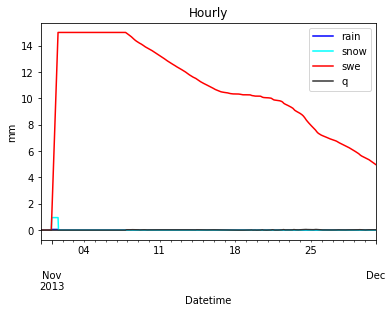

In [5]:
tStart = '2013-10-31 00:00'
tEnd = '2013-12-01 00:00'
in_rain[tStart:tEnd]['10'].plot(color='blue')
in_snow[tStart:tEnd]['10'].plot(color='cyan')
swe[tStart:tEnd]['10'].plot(color='red')
melting[tStart:tEnd]['10'].plot(color='0.2')
plt.legend(['rain', 'snow', 'swe', 'q'])
plt.ylabel("mm")
plt.title('Hourly')
plt.show()

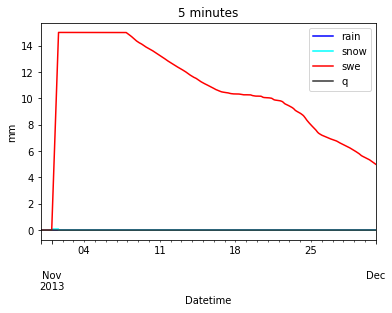

In [113]:
tStart = '2013-10-31 00:00'
tEnd = '2013-12-01 00:00'
in_rain_5min[tStart:tEnd]['10'].plot(color='blue')
in_snow_5min[tStart:tEnd]['10'].plot(color='cyan')
swe_5min[tStart:tEnd]['10'].plot(color='red')
melting_5min[tStart:tEnd]['10'].plot(color='0.2')
plt.legend(['rain', 'snow', 'swe', 'q'])
plt.ylabel("mm")
plt.title('5 minutes')
plt.show()

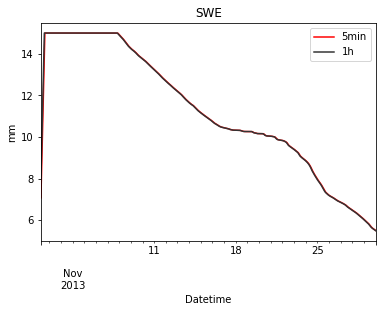

In [114]:
tStart = '2013-11-01 07:00'
tEnd = '2013-11-30 00:00'
swe_5min[tStart:tEnd]['10'].plot(color='red')
swe[tStart:tEnd]['10'].plot(color='0.2')
plt.legend(['5min', '1h'])
plt.ylabel("mm")
plt.title('SWE')
plt.show()

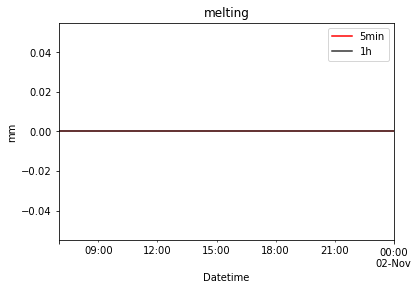

In [115]:
tStart = '2013-11-01 07:00'
tEnd = '2013-11-02 00:00'
melting_5min[tStart:tEnd]['10'].plot(color='red')
melting[tStart:tEnd]['10'].plot(color='0.2')
plt.legend(['5min', '1h'])
plt.ylabel("mm")
plt.title('melting')
plt.show()

## Resample 5 min to hourly

## Resample 5 min to hourly

In [116]:
melting_resampled = melting_5min.resample('1h').sum()
# swe_resampled = swe_5min.resample('1h').mean()

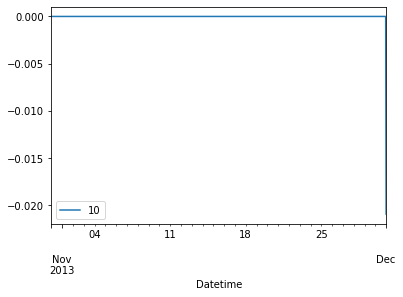

In [117]:
(melting_resampled- melting).plot()

In [17]:
print('hourly\t\t\t5min')
# print(swe.loc['2013-11-01 00:00']['10'], swe_5min.loc['2013-11-01 00:55']['10'])
# print(swe.loc['2013-11-01 01:00']['10'], swe_5min.loc['2013-11-01 01:55']['10'])
# print(swe.loc['2013-11-01 02:00']['10'], swe_5min.loc['2013-11-01 02:55']['10'])
# print(swe.loc['2013-11-01 03:00']['10'], swe_5min.loc['2013-11-01 03:55']['10'])
# print(swe.loc['2013-11-01 04:00']['10'], swe_5min.loc['2013-11-01 04:55']['10'])
# print(swe.loc['2013-11-01 05:00']['10'], swe_5min.loc['2013-11-01 05:55']['10'])
# print(swe.loc['2013-11-01 06:00']['10'], swe_5min.loc['2013-11-01 06:55']['10'])
print(swe.loc['2013-11-01 07:00']['10'], swe_5min.loc['2013-11-01 07:55']['10'])
print(swe.loc['2013-11-01 08:00']['10'], swe_5min.loc['2013-11-01 08:55']['10'])
print(swe.loc['2013-11-01 09:00']['10'], swe_5min.loc['2013-11-01 09:55']['10'])
print(swe.loc['2013-11-01 10:00']['10'], swe_5min.loc['2013-11-01 10:55']['10'])
print(swe.loc['2013-11-01 11:00']['10'], swe_5min.loc['2013-11-01 11:55']['10'])
print(swe.loc['2013-11-01 12:00']['10'], swe_5min.loc['2013-11-01 12:55']['10'])
print(swe.loc['2013-11-01 13:00']['10'], swe_5min.loc['2013-11-01 13:55']['10'])
print(swe.loc['2013-11-01 14:00']['10'], swe_5min.loc['2013-11-01 14:55']['10'])
print(swe.loc['2013-11-01 15:00']['10'], swe_5min.loc['2013-11-01 15:55']['10'])
print(swe.loc['2013-11-01 16:00']['10'], swe_5min.loc['2013-11-01 16:55']['10'])

hourly			5min
0.9999999999999998 1.0
1.9999999999999996 2.000000000000001
2.999999999999999 3.0
3.9999999999999987 3.999999999999998
4.999999999999998 5.0
5.999999999999997 5.999999999999998
6.999999999999997 7.0
7.9999999999999964 8.000000000000002
7.999999999999997 8.000000000000007
7.999999999999997 8.00000000000001


In [ ]:
1440/60


In [ ]:
3600/1440*60